In [3]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [11]:
Constituencies=gpd.read_file("EX1.Data\Constituencies.shp")

In [14]:
Regions_Namibia=gpd.read_file("EX1.Data\Regions_Namibia.shp")

In [15]:
GW_Namibia=gpd.read_file("EX1.Data\GW_Well_Data.shp")

<Axes: >

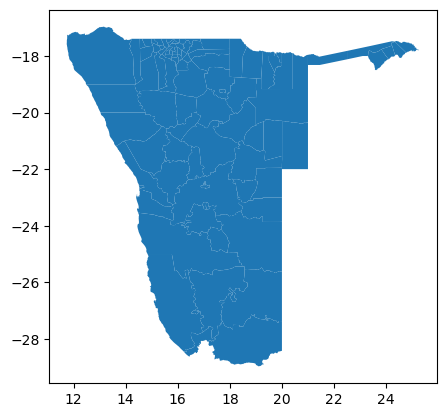

In [18]:
# Basic plot
Constituencies.plot(figsize=(5,10))

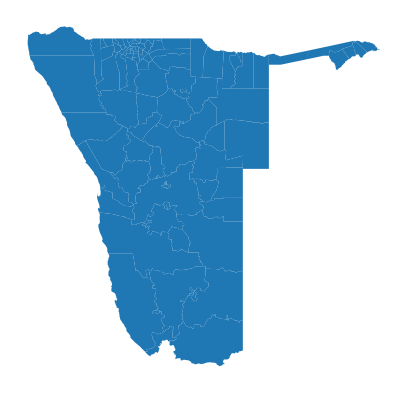

In [20]:
#Removing the box / x and y coordinate labels
ax=Constituencies.plot(figsize=(5,10))
ax.set_axis_off()

In [21]:
Constituencies.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,5.141771,1.146434,Aminius,NA0901,NaN,NaN,NaN,Omaheke,NA09,Namibia,NA,2011-01-01,2020-01-09,NaN,"POLYGON ((20.00000 -22.99931, 20.00000 -23.863..."
1,0.912631,0.030051,Anamulenge,NA1001,NaN,NaN,NaN,Omusati,NA10,Namibia,NA,2011-01-01,2020-01-09,NaN,"POLYGON ((14.99938 -17.39126, 15.00776 -17.391..."
2,7.416662,1.183000,Arandis,NA0201,NaN,NaN,NaN,Erongo,NA02,Namibia,NA,2011-01-01,2020-01-09,NaN,"POLYGON ((15.80612 -23.29859, 15.80556 -23.299..."
3,13.116658,2.869694,Berseba,NA0401,NaN,NaN,NaN,Karas,NA04,Namibia,NA,2011-01-01,2020-01-09,NaN,"MULTIPOLYGON (((16.83518 -27.04759, 16.71839 -..."
4,6.384556,1.547076,Daures,NA0202,NaN,NaN,NaN,Erongo,NA02,Namibia,NA,2011-01-01,2020-01-09,NaN,"POLYGON ((13.93936 -21.01043, 13.93931 -21.009..."


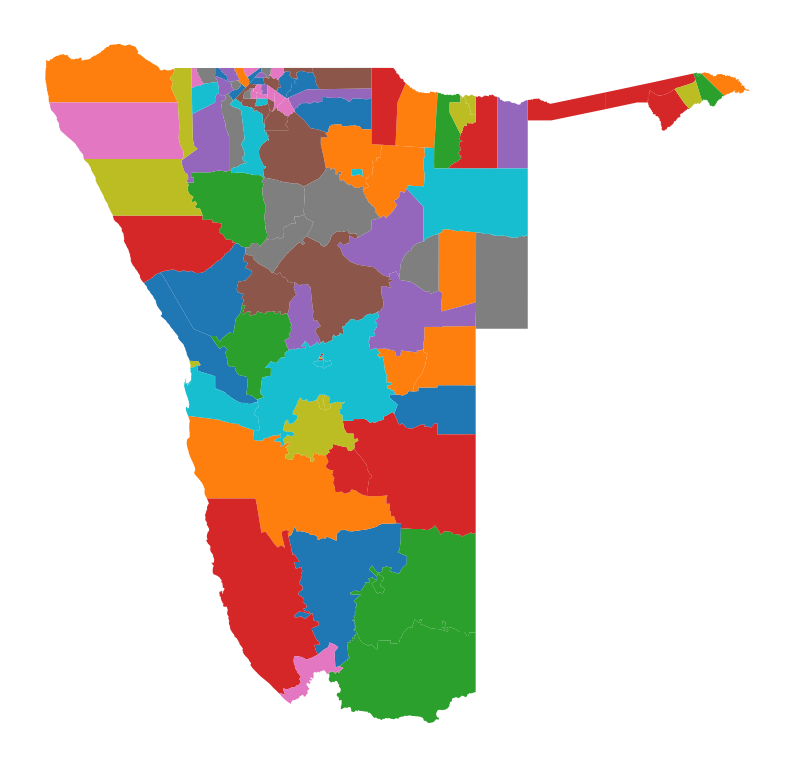

In [64]:
#Coloring based on column values(eg. ADM2_EN) 
ax=Constituencies.plot(figsize=(10,10), column=('ADM2_EN'))
ax.set_axis_off()

<function matplotlib.pyplot.show(close=None, block=None)>

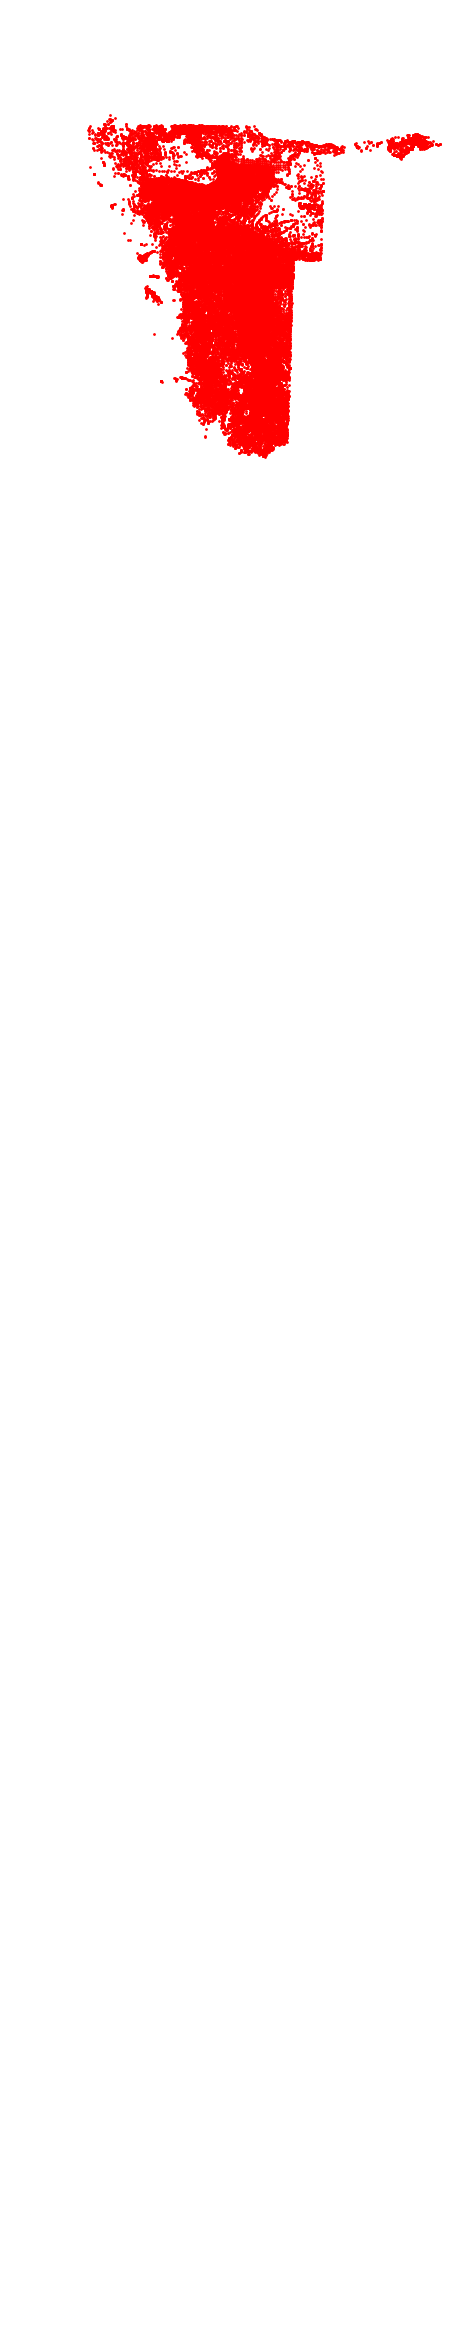

In [37]:
#Combining different dataframes on a single plot
fig, ax=plt.subplots(figsize=(20,30))
Constituencies.plot(ax=ax, color='blue')
Regions_Namibia.plot(ax=ax, color='black')
GW_Namibia.plot(ax=ax, color='red', markersize=1)
ax.set_axis_off()
plt.show


The map provided displays only GW_Namibia, even though we requested information for all three areas. This issue could be due to the coordinate reference system being used.
We should investigate whether the data utilizes different coordinate system

In [38]:
print(Constituencies.crs)

EPSG:4326


In [39]:

print(Regions_Namibia.crs)


EPSG:4326


In [40]:

print(GW_Namibia.crs)

EPSG:32733


The GW_Namibia dataset is based on a distinct coordinate reference system (EPSG=32733), while the other two datasets share a similar coordinate reference system (EPSG=4326).

To align the GW_Namibia data with the same reference system as the other two, we need to project it using EPSG=4326.

In [48]:
# Convert the GW_Namibia to the epsg=4326 reference system
GW_Namibia=GW_Namibia.to_crs(epsg=4326)


The .plot method returns a matplotlib Axes object, which can then be re-used to add additional layers to that plot with the ax= keyword:

ax = countries.plot(fig

<function matplotlib.pyplot.show(close=None, block=None)>

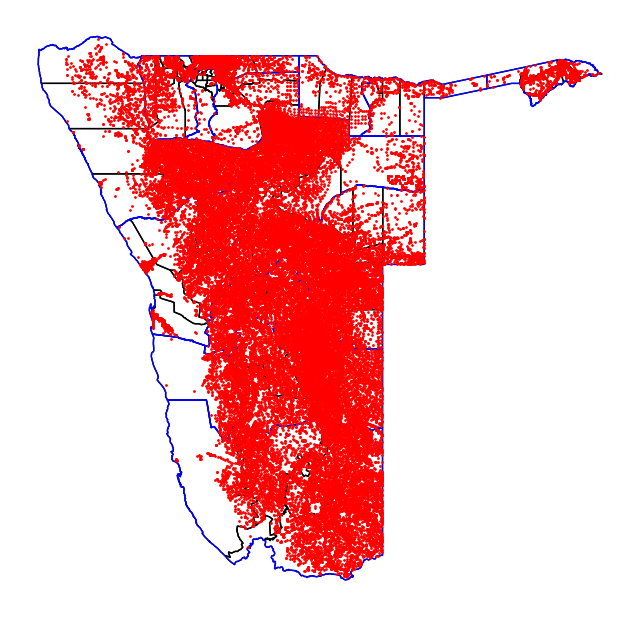

In [65]:
# Now plot all togather 
fig, ax=plt.subplots(figsize=(8,10))
Constituencies.plot(ax=ax, color='none')
Regions_Namibia.plot(ax=ax, color='none', edgecolor='b')
GW_Namibia.plot(ax=ax, color='r', markersize=1)
ax.set_axis_off()
plt.show

# Contextily


The contextily package enables effortless integration of web-tile-based background (basemap) to your GeoPandas plots. Presently,

the sole prerequisite is that your data is already in the WebMercator projection (EPSG:3857).

In [66]:
import contextily 

In [67]:
# adding a background map with contextily
ax=folium.GeoJson(countries).add_to(m).plot(ax=ax, color='none', edgecolor='b')
contextily.add_basemap(ax)

C:\Users\kedir\anaconda3\envs\geo_ds\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

In [70]:
# Project the data using epsg=3857
Regions_Namibia=Regions_Namibia.to_crs(epsg=3857)

In [79]:
print(Regions_Namibia.crs)

EPSG:3857


In [95]:
# adding a background map with contextily
ax=Regions_Namibia.plot(ax=ax, figsize=(10.6), color='none', edgecolor='b')
contextily.add_basemap(ax, url=contextily.providers.Stamen.TonerLite)

C:\Users\kedir\anaconda3\envs\geo_ds\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

# Interactive web-based visualizations using folium

In [81]:
import folium

In [96]:
Regions_Namibia=Regions_Namibia.to_crs(epsg=4326)

In [101]:
m=folium.Map([-22.5637411,16.9921856], zoom_start=6, tiles="OpenStreetMap")
folium.GeoJson(Regions_Namibia).add_to(m)
m

In [92]:
print(Regions_Namibia.crs)

EPSG:3857


In [94]:
print(GW_Namibia.crs)

EPSG:4326


In [104]:
Regions_Namibia.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,...,Total_Beds,Per_ICU,Per_Venti,stage1,Stage2,stage3,stage4,Cas_sep18,Cuurehos_S,geometry
0,12.859253,5.563062,Erongo,NA02,NaN,NaN,NaN,Namibia,NA,2011-01-01,...,673,0.59,0.45,-34.8,-10.4,-40.2,-39.6,3759,22,"POLYGON ((15.44997 -20.49270, 15.49120 -20.542..."
1,19.732942,9.771173,Hardap,NA03,NaN,NaN,NaN,Namibia,NA,2011-01-01,...,417,0.00,0.00,-45.2,-13.1,-8.1,-3.1,318,105,"POLYGON ((17.10939 -23.16684, 17.17384 -23.199..."
2,21.247386,14.666164,Karas,NA04,NaN,//Karas,NaN,Namibia,NA,2011-01-01,...,349,0.00,0.00,-30.1,-19.7,-10.6,-12.0,322,127,"POLYGON ((15.79811 -25.10764, 15.88710 -25.605..."
3,9.414164,2.169561,Kavango East,NA05,NaN,NaN,NaN,Namibia,NA,2011-01-01,...,698,0.70,0.46,-38.4,-8.8,-7.2,-7.0,102,29,"POLYGON ((22.50000 -17.82050, 22.50000 -18.117..."
4,7.342886,1.972969,Kavango West,NA14,NaN,NaN,NaN,Namibia,NA,2011-01-01,...,165,0.00,0.00,-38.4,-8.8,-9.5,-9.0,8,4,"POLYGON ((18.48531 -17.48617, 18.48744 -17.486..."
